In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
info = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
info.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
info.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
info.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
info.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
info.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
info.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
def null_detection(info):
    num_cols=[]
    count=0
    t=[]
    for i in num_cols:
        z=np.abs(stats.zscore(info[i]))
        for j in range(len(z)):
            if(z[j]>3 or z[j]<-3):
                t.append(j)
                count+=1
    info = info.drop(list(set(t)))
    info = info.reset_index()
    info = info.drop('index', axis=1)
    print(count)
    return info

In [11]:
info = null_detection(info)

0


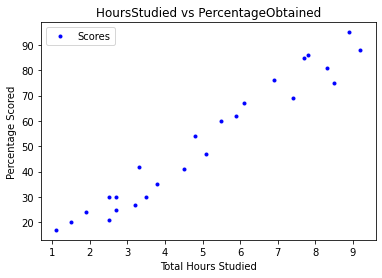

In [12]:
info.plot(x='Hours',y='Scores',style='.',color='blue')
plt.title('HoursStudied vs PercentageObtained')
plt.xlabel('Total Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [13]:
mean_x = np.mean(info['Hours'])
mean_y = np.mean(info['Scores'])
numerator = 0
denominator = 0
x= list(info['Hours'])
y= list(info['Scores'])
for i in range(len(info)):
    numerator+=(x[i]-mean_x)*(y[i]-mean_y)
    denominator+=(x[i]-mean_x)**2
A = numerator/denominator

In [14]:
A

9.775803390787475

In [16]:
B = mean_y - A*mean_x

In [17]:
B

2.4836734053731746

In [18]:
info['Predicted Scores'] = B + A*info['Hours']

In [19]:
info.head()

,Hours,Scores,Predicted Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

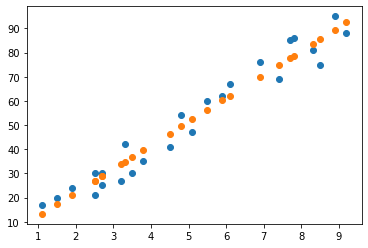

In [20]:
plt.scatter(info['Hours'],info['Scores'])
plt.scatter(info['Hours'],info['Predicted Scores'])
plt.plot()

In [21]:
B + A*9.25

92.90985477015732

In [22]:
y=list(info['Scores'].values)
pred_y = list(info['Predicted Scores'].values)

In [23]:
s = sum([(pred_y[i] - y[i])**2 for i in range(len(info))])
rmse = (np.sqrt(s/len(info)))/mean_y

In [24]:
rmse

0.10439521325937494